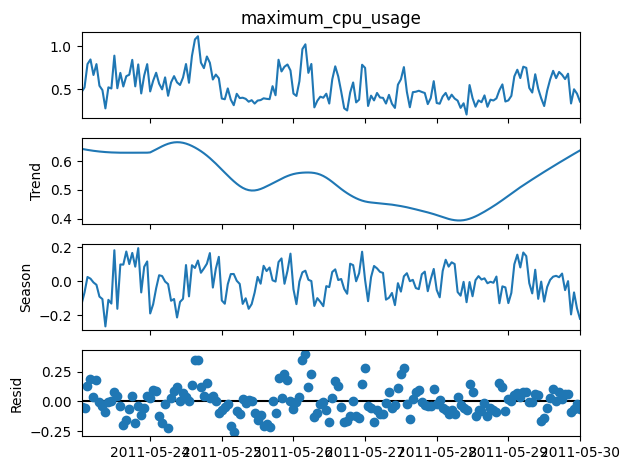

<Figure size 3500x1000 with 0 Axes>

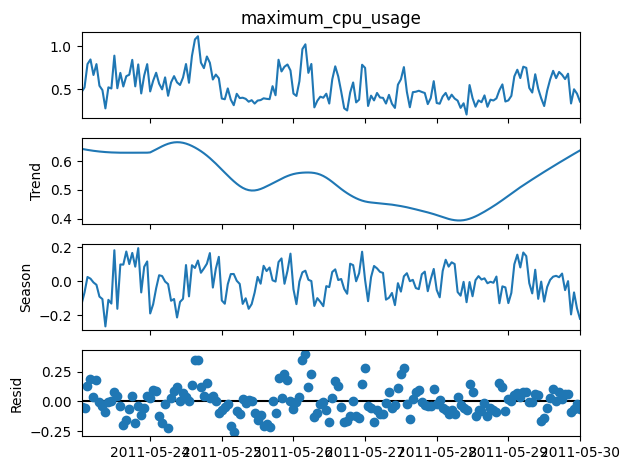

In [53]:
import pandas as pd  
import pandas as pd  
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt  
  
df = pd.read_csv('resampled_cpu_usage_per_machine.csv')  
df['start_time'] = pd.to_datetime(df['start_time'])  
df.set_index('start_time', inplace=True)  

machines = df['machine_id'].unique()  
# machineId: 381129
selected_machines = machines[:1]  
plt.figure(figsize=(35, 10)) 

target_machine_data = []
# Create a plot for each machine  
for machine in selected_machines:  
    df_machine = df[df['machine_id'] == machine].tail(1000)
    target_machine_data = df_machine
    df_machine = df_machine.resample('H').mean()

# Perform STL decomposition  
stl = STL(df_machine['maximum_cpu_usage'], seasonal=7)  
result = stl.fit()  
# Plot the STL decomposition  
result.plot()  